# Data Bootcamp:  Examples

Most of what we do in this course is find some data that interests us, read it into Python, organize it in a convenient form, and produce a graph.  The details vary, but that's the general plan.  The best-case scenario:  The graph tells us something we don't know, and points to other things we'd like to follow up on.  As for the Python code: You'll be able to do all this and more by the end of the term.  

Most of this runs with packages that come pre-installed with the [Anaconda distribution](https://www.continuum.io/downloads). The exceptions are the options example, which uses the pandas-datareader package, and the heatmap we produced for economic indicators using the seaborn package. We'll talk more about this later, but you can install them from the terminal or command line with `conda install package`.

## Preliminaries

The tradition is to put import statements at the top and be done with them.  But since we sometimes run sections of code separately, we've repeated some of them below.  That's ok, a second import is redundant but does only aesthetic harm.  

In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2018-01-17
What version of Python are we running? 
3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


## Example:  US economic conditions

We see a lot of variation in GDP growth rates in all countries.  It's not obvious why, but it's  a fact of life, and one that investors and other business analysts track closely.  Basic numbers like GDP only come out quarterly, and with at least a one month lag, so we're often in the position of not knowing how the economy is doing now, much less how it will do in the future.  To get a clearer sense of current conditions, analysts typically look at a wide range of indicators.  Many of these indicators are available more quickly than GDP.  Since they typically move up and down with GDP, we can use their movements to infer what GDP might be doing.  

Of the hundreds of economic indicators, some of the most popular (with their FRED codes) are 

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  permits for new housing 
* UMCSENT: consumer sentiment 

All of them are monthly.  You can find more about this kind of thing in [our book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course), chapter 11.  

In [9]:
# get data from FRED
import pandas as pd 
from pandas_datareader import data, wb
import datetime as dt                  # handles dates 

# get data 
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'UMCSENT']
start_date = dt.datetime(2000, 1, 1)
inds = data.DataReader(indicators, "fred", start_date)
end_date = inds.index[-1]

# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
g_std = (g - g.mean()) / g.std()
gs = g_std

# correlations 
g_std.corr()

,INDPRO,PAYEMS,AWHMAN,PERMIT,UMCSENT
INDPRO,1.000000,0.682220,0.755572,0.485833,0.192524
PAYEMS,0.682220,1.000000,0.323484,0.431007,0.047742
AWHMAN,0.755572,0.323484,1.000000,0.375188,0.339960
PERMIT,0.485833,0.431007,0.375188,1.000000,0.407877
UMCSENT,0.192524,0.047742,0.339960,0.407877,1.000000


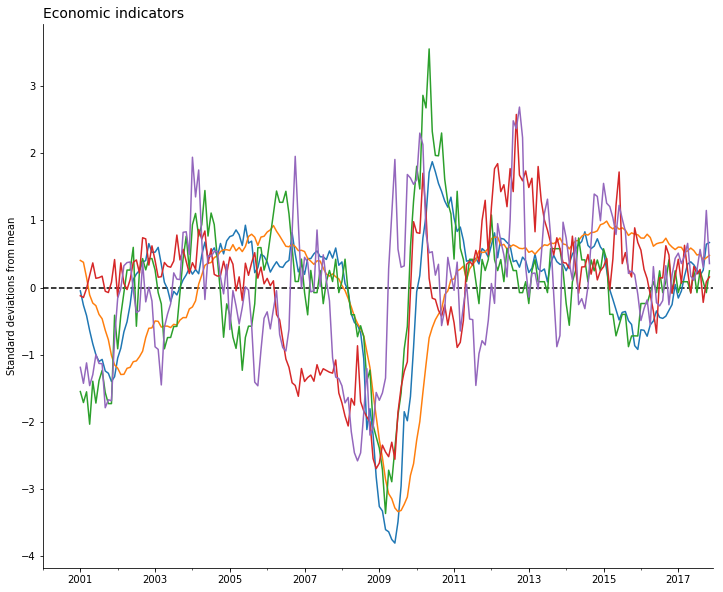

In [11]:
# plot 
fig, ax = plt.subplots(figsize = (12,10))
g_std.plot(ax=ax) 
ax.set_title('Economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
ax.legend().set_visible(False)

ax.set_xlim(start_date, end)

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

In [12]:
# focus on recent past 
recent_date = dt.datetime(2011, 1, 1)
g_std = g_std[g_std.index>=recent_date]

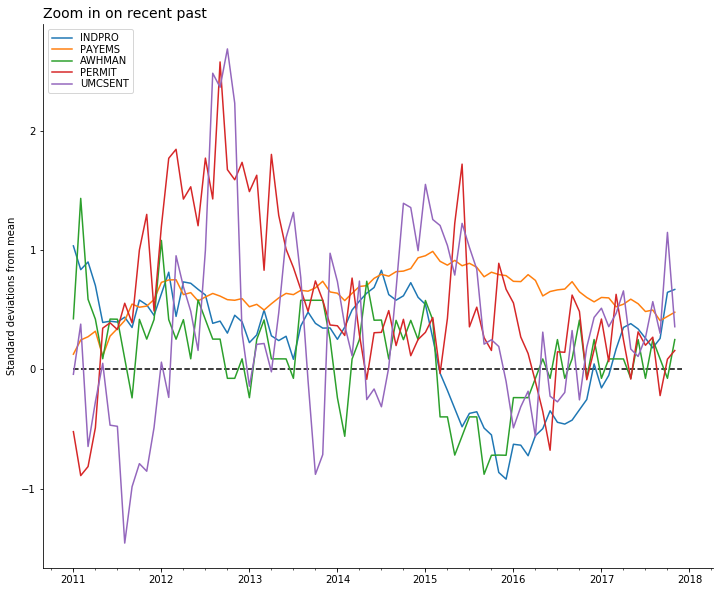

In [14]:
fig, ax = plt.subplots(figsize = (12,10))
g_std.plot(ax=ax)

ax.set_title('Zoom in on recent past', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')

ax.hlines(y=0, xmin=recent_date, xmax=end, linestyles='dashed')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

ax.spines["right"].set_visible(False) # This removes the ``spines'', just the right and top
ax.spines["top"].set_visible(False) # ones...

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?    

## Example:  Employment trends  

Not long ago, the US had more people working (a higher fraction of the adult population) than many other developed countries.  Over the past 15 years things have flipped.  The deep question is why, but here we simply report what we know.   

The key variables are the **employment rate** (fraction of people aged 25-54) and the **participation rate** (fraction either working or unemployed).  They're similar but the latter irons out some of the cyclical fluctuations.  We get the data from FRED, but they get it from the OECD's Main Economic Indicators, which covers mostly rich countries.  

In [18]:
plt.style.use('ggplot')

# countries = AU, CA, CH, DE, ES, EU, EZ, FR, GB, JP, KR, NL, O1 (OECD), SE, US, ZA 
countries = ['CA', 'DE', 'GB', 'JP', 'US']
emcodes = ['LREM25TT' + c + 'Q156S' for c in countries]
lrcodes = ['LRAC25TT' + c + 'Q156S' for c in countries]

start_date = dt.datetime(2000, 1, 1)
em = data.DataReader(emcodes, 'fred', start_date)
lr = data.DataReader(lrcodes, 'fred', start_date)
em.columns = countries
lr.columns = countries
em.head(3)

,CA,DE,GB,JP,US
DATE,,,,,
2000-01-01,79.9,NaN,79.9,78.4,81.7
2000-04-01,79.9,NaN,80.2,78.8,81.6
2000-07-01,79.8,NaN,80.4,78.7,81.3


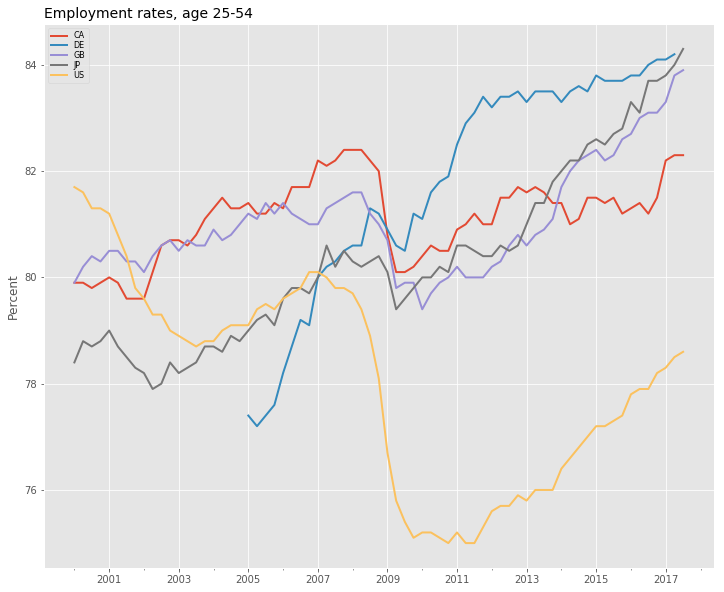

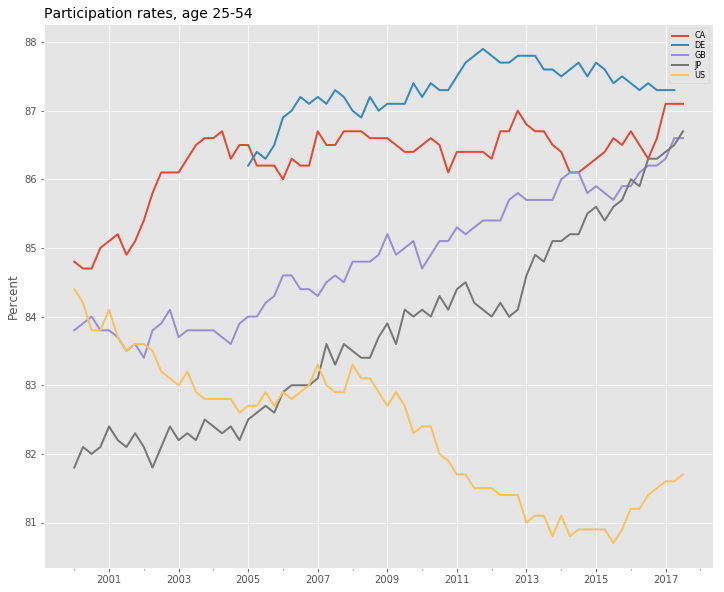

In [20]:
def emplot(em, title):
    fig, ax = plt.subplots(figsize = (12,10))
    em.plot(ax=ax, lw=2)
    ax.set_title(title, fontsize=14, loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Percent')
    ax.legend(loc='best', fontsize=8, handlelength=2, labelspacing=0.1)
    
emplot(em, 'Employment rates, age 25-54')
emplot(lr, 'Participation rates, age 25-54')

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?   

## Example:  US government bond yields 

People often refer to interest rates moving up and down, but in fact the **yields** (as we call them) move up and down differently at different maturities.  From 2010 to 2015, for examples, yields on bonds with maturities under 2 years were essentially fixed at zero, but yields on higher maturities moved up and down quite a bit.  

One challenge with bond yields is getting good data.  Bonds are typically traded over the counter, and those bonds differ in maturity, coupon, and often other features.  Analysts often focus on the interest rates of pure discount "zero-coupon" bonds, which they infer from prices of coupon bonds -- which are, after all, what is generally traded.  This isn't something to go into unless you have a strong interest.  Suffice it to say that we have taken these yields from [estimates supplied by the Fed](http://www.federalreserve.gov/pubs/feds/2006/200628/200628abs.html).

This is still a work in progress, but our goal is to produce a movie of bond yields over time.  

In [37]:
url = 'http://pages.stern.nyu.edu/~dbackus/Data/GSW_nominal_yields.csv'
y = pd.read_csv(url, index_col=0, parse_dates=True)
#y[list(range(10))].tail()

In [38]:
# compute mean yields
ybar = y.mean(axis=0)
ystd = y.std(axis=0)
maturities = list(range(1,122))
ybar.index = maturities
ystd.index = maturities

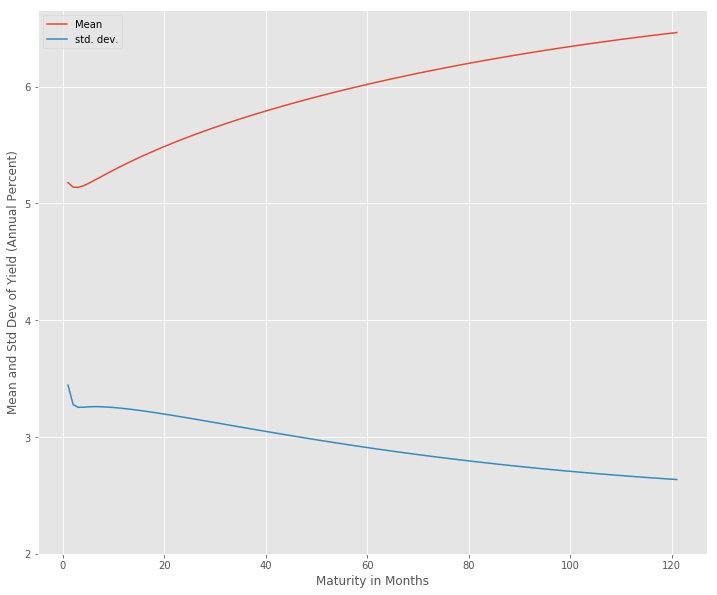

In [40]:
fig, ax = plt.subplots(figsize=(12,10))
ybar.plot(ax=ax)
ystd.plot(ax=ax)
ax.set_xlabel('Maturity in Months')
ax.set_ylabel('Mean and Std Dev of Yield (Annual Percent)')
ax.set_ylim(2)
ax.legend(["Mean", "std. dev."])

### Questions

* What would you change in this picture?
* What did you learn?
* What else would you like to know?
* Where does the data come from?   